In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from natsort import natsorted
import re
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

np.set_printoptions(threshold=sys.maxsize)
# Load the pickle file into a DataFrame
data = pd.read_pickle('ad-chega.pkl')
pd.set_option('display.max_rows', None)
#first lets order the images

data = data.sort_values(by='filename')


image_embedding = data.iloc[:, 5]

print(image_embedding)

C:\Users\berna\AppData\Local\Temp\ipykernel_3624\3223535852.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1454    [2, 254, 2, 0, 2, 253, 3, 254, 255, 6, 255, 11...
1117    [2, 254, 2, 0, 5, 254, 6, 253, 255, 4, 253, 18...
2111    [253, 253, 253, 0, 253, 3, 4, 253, 253, 0, 255...
1757    [0, 255, 253, 253, 0, 0, 253, 254, 254, 1, 254...
307     [2, 0, 254, 0, 254, 2, 255, 255, 254, 0, 254, ...
1421    [2, 0, 254, 0, 254, 2, 255, 255, 254, 1, 254, ...
1062    [4, 0, 253, 0, 254, 2, 0, 253, 253, 1, 253, 11...
1288    [254, 253, 8, 255, 254, 254, 3, 253, 1, 253, 0...
122     [253, 253, 13, 254, 253, 254, 1, 253, 1, 255, ...
937     [253, 253, 7, 254, 253, 255, 2, 253, 3, 255, 0...
2280    [254, 2, 253, 255, 253, 254, 1, 255, 8, 4, 0, ...
1442    [253, 9, 0, 1, 254, 253, 253, 253, 21, 6, 0, 0...
2095    [254, 4, 2, 255, 253, 255, 253, 254, 24, 3, 0,...
212     [255, 2, 0, 2, 254, 0, 0, 0, 11, 6, 0, 9, 255,...
274     [254, 1, 6, 254, 0, 253, 255, 253, 19, 6, 0, 4...
1027    [254, 0, 7, 255, 255, 254, 0, 253, 13, 3, 0, 7...
2011    [254, 3, 9, 0, 254, 254, 0, 253, 19, 4, 0, 7, ...
354     [255, 

ValueError: perplexity must be less than n_samples

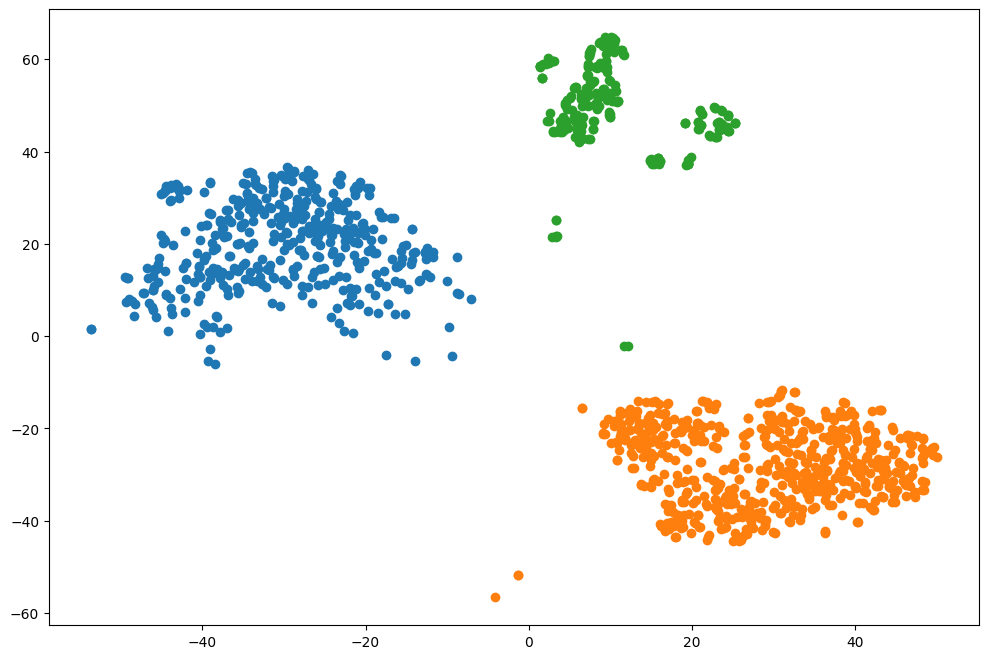

In [6]:

image_embeddings = np.stack(data.iloc[:, 5].to_numpy())


# Choose the number of clusters
num_clusters = 6  # for example, you might need to optimize this number

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)  # fixed random state for reproducibility

# Fit the model to the data
kmeans.fit_predict(image_embeddings)

tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(image_embeddings)

# Get the cluster assignments for each image embedding
labels = kmeans.labels_

# Create a scatter plot
plt.figure(figsize=(12, 8))

for i in range(3):  # Assuming you have 3 clusters
    # Select only data points that match the current cluster label
    cluster_data = reduced_data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

# Optionally, mark the cluster centers
cluster_centers_2d = tsne.fit_transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], s=300, c='red', label='Centers', marker='X')

# Add the legend, grid, and title
plt.legend()
plt.grid(True)
plt.title('t-SNE projection of the image embeddings clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Show the plot
plt.show()
